# The arformation and Accept/Reject (aka. Von Neumann) methods 
Python notebook with exercise on how to generate random numbers following a specific PDF using uniformly distributed random numbers, in this case a third degree polynomial: $f(x) = x^3$, in the interval $[0, C]$ where $C$ is a number that ensures that the function if properly normalized.

Both the Accept-Reject (Von Neumann) and transformation method should be considered for the problem:
- Transformation method (if function can be integrated and then inverted).
- Accept-Reject (or Hit & Miss) method (by Ulam Stanislav and John Von Neumann).

### References:
- G. Cowan: Chapter 3
- P. R. Bevington: page 81-84
- __[40. Monte Carlo Techniques PDG](https://pdg.lbl.gov/2023/reviews/rpp2023-rev-monte-carlo-techniques.pdf)__

### Authors: 
- Troels C. Petersen (Niels Bohr Institute)

### Date:    
- 04-12-2023 (latest update)

***

In [76]:
import numpy as np                                     # Matlab like syntax for linear algebra and functions
import matplotlib.pyplot as plt                        # Plots and figures like you know them from Matlab
import seaborn as sns                                  # Make the plots nicer to look at
from iminuit import Minuit                             # The actual fitting tool, better than scipy's
import sys                                             # Modules to see files and folders in directories
from scipy import stats

Load external functions:

In [77]:
sys.path.append('../../AppStat2023/External_Functions')
from ExternalFunctions import Chi2Regression, BinnedLH, UnbinnedLH
from ExternalFunctions import nice_string_output, add_text_to_ax    # Useful functions to print fit results on figure

plt.rcParams['font.size'] = 18     # Set some basic plotting parameters

set the parameters of the program:

In [78]:
r = np.random
r.seed(42)

save_plots = False  
N_points = 10000      # Number of random points used 

xmin = 0
xmax = 4**(1/4)            # Find out yourself what a good interval is.
N_bins = 100          # Find out yourself what a good number of bins is.

# f(x):
def fx_x3(x) :
    k = (xmax - xmin) / N_bins
    N = N_points * k
    return N * x**3

In [79]:
# Define the numpy arrays to be filled:
x_transformation = np.zeros(N_points)
x_accepted       = np.zeros(N_points)

In [80]:
# TRANSFORMATION METHOD

x_transformation = (4*r.uniform(size=N_points))**(1/4)

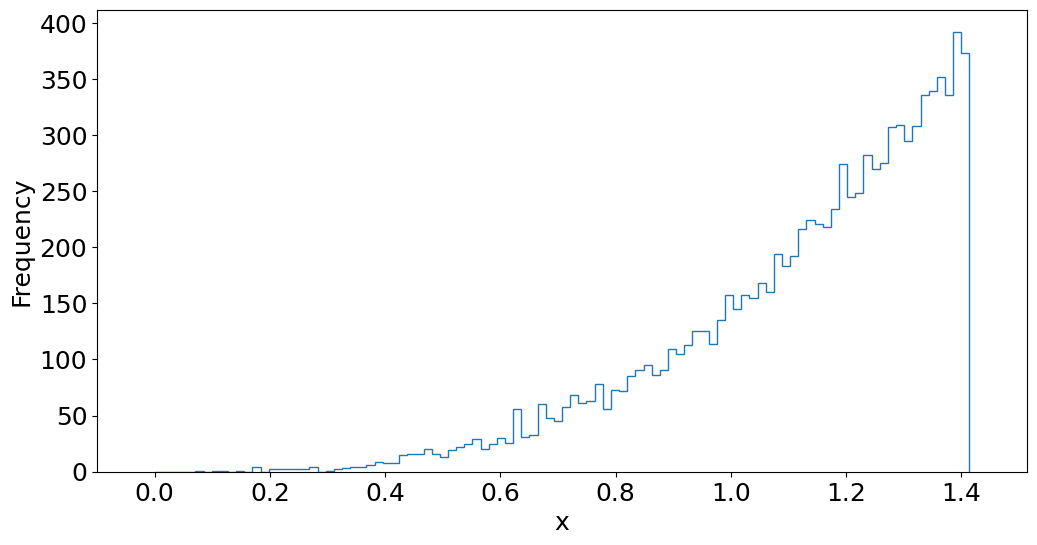

In [81]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(x_transformation, bins=N_bins, range=(xmin, xmax), histtype='step', label='histogram' )
ax.set(xlabel="x", ylabel="Frequency", xlim=(xmin-0.1, xmax+0.1));

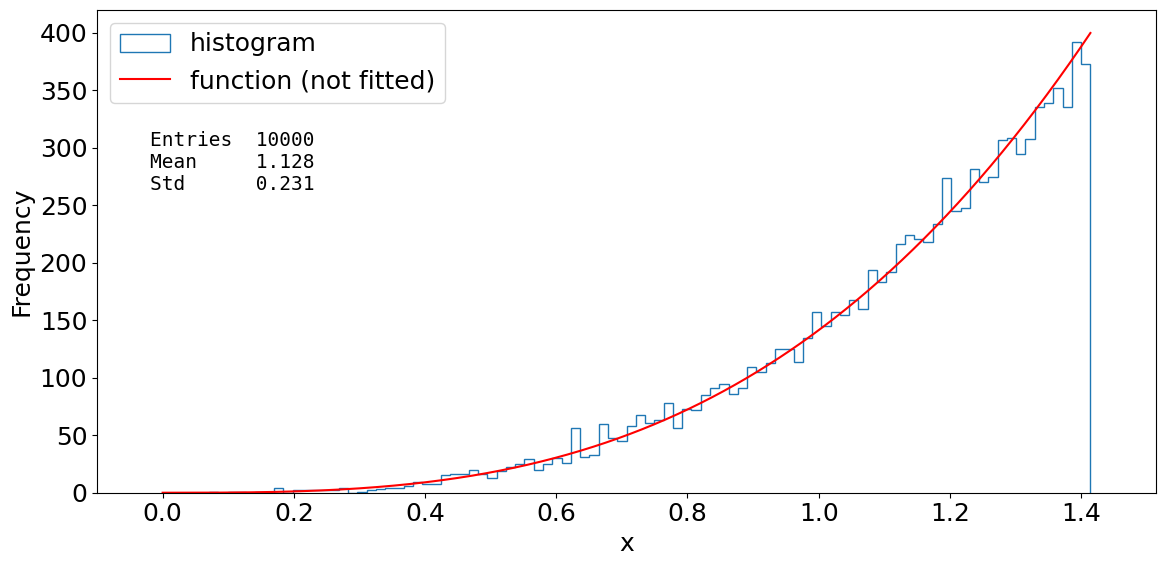

In [82]:
# Plot f(x)
x_axis1 = np.linspace(xmin, xmax, 1000)
y_axis1 = fx_x3(x_axis1)
ax.plot(x_axis1, y_axis1, 'r-', label='function (not fitted)')

# Define figure text
d = {'Entries': len(x_transformation),
     'Mean': x_transformation.mean(),
     'Std': x_transformation.std(ddof=1),
    }

# Plot figure text
text = nice_string_output(d, extra_spacing=2, decimals=3)
add_text_to_ax(0.05, 0.75, text, ax, fontsize=14)

# Add legend
ax.legend(loc='best')
fig.tight_layout()

# Save figure
if save_plots: 
    fig.savefig("Hist_2x_arformationMethod.pdf", dpi=600)

# Show the figure
fig

In [83]:
# ACCEPT REJECT METHOD

N_try = 0
ymin = 0.0      # Minimum value the function will take!
ymax = xmax**3      # Maximum value the function will take!
x_accepted = np.zeros(N_points)

for i in range(N_points):
    
    while True:
        
        # Count the number of tries, to get efficiency/integral
        N_try += 1                    
        
        # Range that f(x) is defined/wanted in:
        x_test = r.uniform(xmin, xmax)  
        
        # Upper bound for function values:
        y_test = r.uniform(ymin, ymax)
        
        if (y_test < x_test**3):
            break
            
    x_accepted[i] = x_test

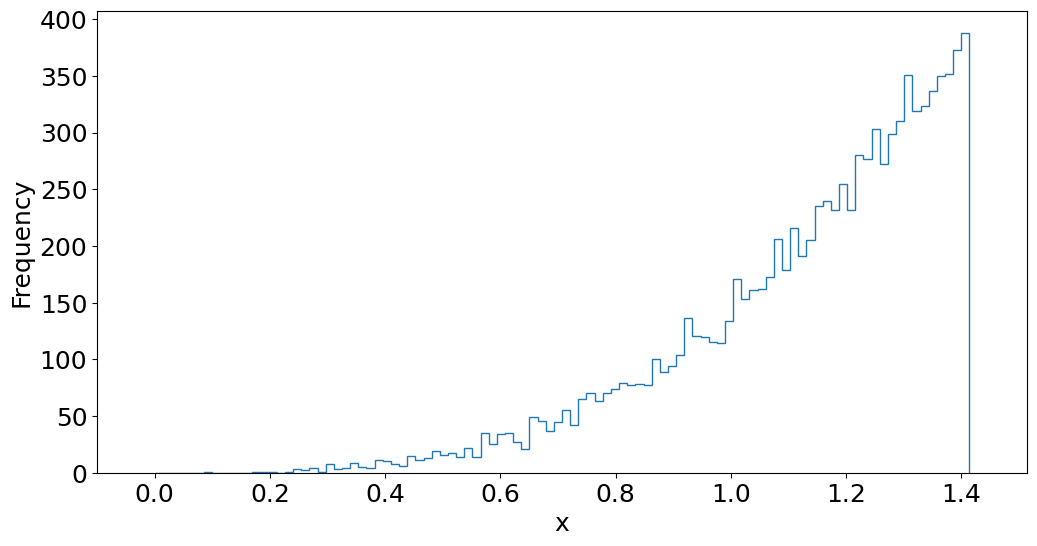

In [84]:
fig2, ax2 = plt.subplots(figsize=(12, 6))
ax2.hist(x_accepted, bins=N_bins, range=(xmin, xmax), histtype='step', label='histogram' )
ax2.set(xlabel="x", ylabel="Frequency", xlim=(xmin-0.1, xmax+0.1));

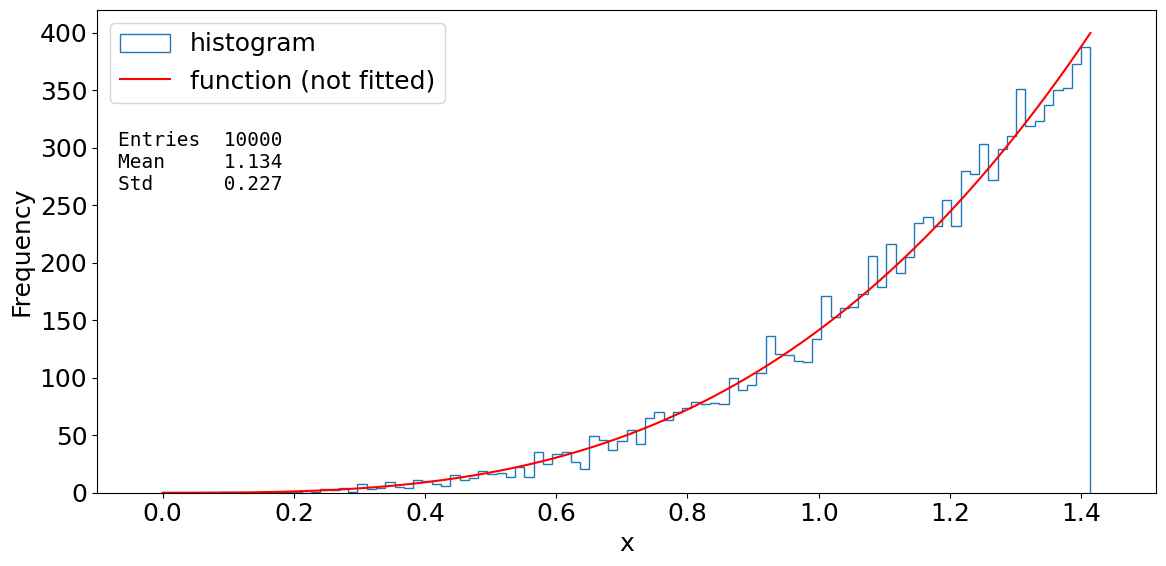

In [85]:
# Plot f(x)
x_axis2 = np.linspace(xmin, xmax, 1000)
y_axis2 = fx_x3(x_axis2)
ax2.plot(x_axis2, y_axis2, 'r-', label='function (not fitted)')

# Define the figure text
d2 = {'Entries': len(x_accepted),
      'Mean': x_accepted.mean(),
      'Std': x_accepted.std(ddof=1),
    }

# Add figure text
text2 = nice_string_output(d2, extra_spacing=2, decimals=3)
add_text_to_ax(0.02, 0.75, text2, ax2, fontsize=14)

# Add legend
ax2.legend(loc='best')
fig2.tight_layout()

# Save figure
if save_plots: 
    fig2.savefig("Hist_2x_AcceptRejectMethod.pdf", dpi=600)
    
# Show the figure
fig2

In [86]:
### Fit with 3rd degree polynomial for transformation method

def pol3(x, a, b, c, d):
    k = (xmax - xmin) / N_bins
    N = N_points * k
    return N * (a * x**3 + b * x**2 + c * x + d)

counts_ar, bin_edges_trans = np.histogram(x_transformation, bins=N_bins, range=(xmin, xmax))
x_trans = (bin_edges_trans[1:][counts_trans>0] + bin_edges_trans[:-1][counts_trans>0])/2
y_trans = counts_trans[counts_trans>0]
sy_trans = np.sqrt(counts_trans[counts_trans>0])

chi2fit_trans = Chi2Regression(pol3, x_trans, y_trans, sy_trans)

minuit_chi2_trans = Minuit(chi2fit_trans, a=0, b=0, c=0, d=0)
minuit_chi2_trans.errordef = 1.0     # This is the definition for ChiSqaure fits
minuit_chi2_trans.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 72.27                      │              Nfcn = 94               │
│ EDM = 2.17e-16 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   0.77    │   0.09    │            │            │         │         │       │
│ 1 │ b    │   0.44    │   0.15    │            │            │         │         │       │
│ 2 │ c    │   -0.23   │   0.07    │            │            │         │         │       │
│ 3 │ d    │   0.027   │   0.008   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────────────────────────────┐
│   │        a        b        c        d │
├───┼─────────────────────────────────────┤
│ a │  0.00781   -0.013    0.006 -0.55e-3 │
│ b │   -0.013   0.0234   -0.010  1.06e-3 │
│ c │    0.006   -0.010  0.00483 -0.55e-3 │
│ d │ -0.55e-3  1.06e-3 -0.55e-3 7.15e-05 │
└───┴─────────────────────────────────────┘

In [87]:
# First, check if the result was a valid minimum:
if (not minuit_chi2_trans.fmin.is_valid) :
    print("  WARNING: The ChiSquare fit DID NOT converge!!! ")  

a_trans, b_trans, c_trans, d_trans = minuit_chi2_trans.values[:]   # The fitted values of the parameters

# Loop to get both parameter values and uncertainties:
for name in minuit_chi2_trans.parameters :
    value, error = minuit_chi2_trans.values[name], minuit_chi2_trans.errors[name]
    print(f"Fit value: {name} = {value:.5f} +/- {error:.5f}")

# Get Chi2 value:
chi2_value_trans = minuit_chi2_trans.fval            # The value minimised, i.e. Chi2 or -2*LogLikeliHood (LLH) value

# Get number of degrees-of-freedom (Ndof):
Ndof_value_trans = N_bins - minuit_chi2_trans.nfit

Prob_value_trans = stats.chi2.sf(chi2_value_trans, Ndof_value_trans) # The chi2 probability given N_DOF degrees of freedom
print(f"Chi2 value: {chi2_value_trans:.1f}   Ndof = {Ndof_value_trans:.0f}    Prob(Chi2,Ndof) = {Prob_value_trans:5.3f}")

Fit value: a = 0.76760 +/- 0.08836
Fit value: b = 0.44350 +/- 0.15298
Fit value: c = -0.22962 +/- 0.06953
Fit value: d = 0.02740 +/- 0.00846
Chi2 value: 72.3   Ndof = 96    Prob(Chi2,Ndof) = 0.966


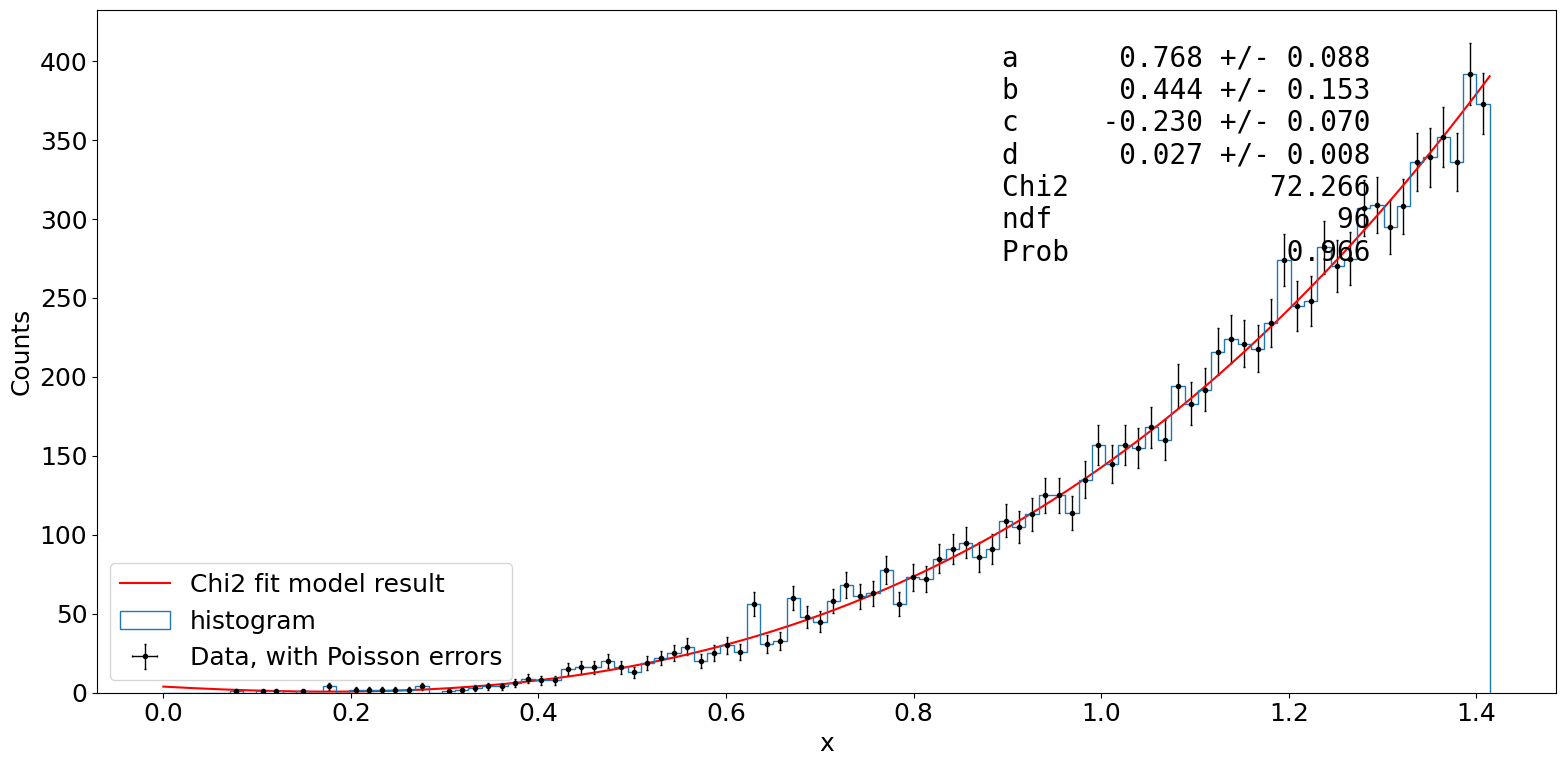

In [88]:
# Create just a single figure and axes, along with a histogram with uncertainties:
fig, ax = plt.subplots(figsize=(16, 8))  # figsize is in inches

ax.errorbar(x_trans, y_trans, yerr=sy_trans, xerr=0.0, label='Data, with Poisson errors', fmt='.k',  ecolor='k', elinewidth=1, capsize=1, capthick=1)

# Set the figure texts; xlabel, ylabel and title.
ax.set(xlabel="x", # the label of the y axis
       ylabel="Counts"),  # the label of the y axis
       #title="Distribution of Gaussian and exponential numbers", # the title of the plot
       #ylim=[0.0,None]) # Setting the miminum to zero

# Adding fit function to plot:
x_axis = np.linspace(xmin, xmax, 1000)
ax.plot(x_axis, pol3(x_axis, *minuit_chi2_trans.values[:]), '-r', label='Chi2 fit model result') 
ax.hist(x_transformation, bins=N_bins, range=(xmin, xmax), histtype="step", label="histogram")

# Adding fit results to plot:
d = {'a':   [minuit_chi2_trans.values['a'], minuit_chi2_trans.errors['a']],
     'b':       [minuit_chi2_trans.values['b'], minuit_chi2_trans.errors['b']],
     'c':       [minuit_chi2_trans.values['c'], minuit_chi2_trans.errors['c']],
     'd':     [minuit_chi2_trans.values['d'], minuit_chi2_trans.errors['d']],
     'Chi2':     chi2_value_trans,
     'ndf':      Ndof_value_trans,
     'Prob':     Prob_value_trans,
    }

text = nice_string_output(d, extra_spacing=2, decimals=3)
add_text_to_ax(0.62, 0.95, text, ax, fontsize=20)
ax.legend(loc='lower left', fontsize=18); # could also be # loc = 'upper right' e.g.
fig.tight_layout()

In [89]:
### Fit with 3rd degree polynomial for accept-reject method

counts_ar, bin_edges_ar = np.histogram(x_accepted, bins=N_bins, range=(xmin, xmax))
x_ar = (bin_edges_ar[1:][counts_ar>0] + bin_edges_ar[:-1][counts_ar>0])/2
y_ar = counts_trans[counts_ar>0]
sy_ar = np.sqrt(counts_ar[counts_ar>0])

chi2fit_ar = Chi2Regression(pol3, x_ar, y_ar, sy_ar)

minuit_chi2_ar = Minuit(chi2fit_ar, a=0, b=0, c=0, d=0)
minuit_chi2_ar.errordef = 1.0     # This is the definition for ChiSqaure fits
minuit_chi2_ar.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 97.28                      │              Nfcn = 87               │
│ EDM = 3.97e-15 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   0.72    │   0.10    │            │            │         │         │       │
│ 1 │ b    │   0.52    │   0.17    │            │            │         │         │       │
│ 2 │ c    │   -0.24   │   0.09    │            │            │         │         │       │
│ 3 │ d    │   0.029   │   0.012   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────────────────────────────┐
│   │        a        b        c        d │
├───┼─────────────────────────────────────┤
│ a │  0.00907   -0.016    0.007 -0.87e-3 │
│ b │   -0.016   0.0297   -0.014  1.75e-3 │
│ c │    0.007   -0.014  0.00731 -0.96e-3 │
│ d │ -0.87e-3  1.75e-3 -0.96e-3 0.000139 │
└───┴─────────────────────────────────────┘

In [90]:
# First, check if the result was a valid minimum:
if (not minuit_chi2_ar.fmin.is_valid) :
    print("  WARNING: The ChiSquare fit DID NOT converge!!! ")  

a_ar, b_ar, c_ar, d_ar = minuit_chi2_ar.values[:]   # The fitted values of the parameters

# Loop to get both parameter values and uncertainties:
for name in minuit_chi2_ar.parameters :
    value, error = minuit_chi2_ar.values[name], minuit_chi2_ar.errors[name]
    print(f"Fit value: {name} = {value:.5f} +/- {error:.5f}")

# Get Chi2 value:
chi2_value_ar = minuit_chi2_ar.fval            # The value minimised, i.e. Chi2 or -2*LogLikeliHood (LLH) value

# Get number of degrees-of-freedom (Ndof):
Ndof_value_ar = N_bins - minuit_chi2_ar.nfit

Prob_value_ar = stats.chi2.sf(chi2_value_ar, Ndof_value_ar) # The chi2 probability given N_DOF degrees of freedom
print(f"Chi2 value: {chi2_value_ar:.1f}   Ndof = {Ndof_value_ar:.0f}    Prob(Chi2,Ndof) = {Prob_value_ar:5.3f}")

Fit value: a = 0.72027 +/- 0.09525
Fit value: b = 0.51505 +/- 0.17227
Fit value: c = -0.24461 +/- 0.08552
Fit value: d = 0.02884 +/- 0.01177
Chi2 value: 97.3   Ndof = 96    Prob(Chi2,Ndof) = 0.444


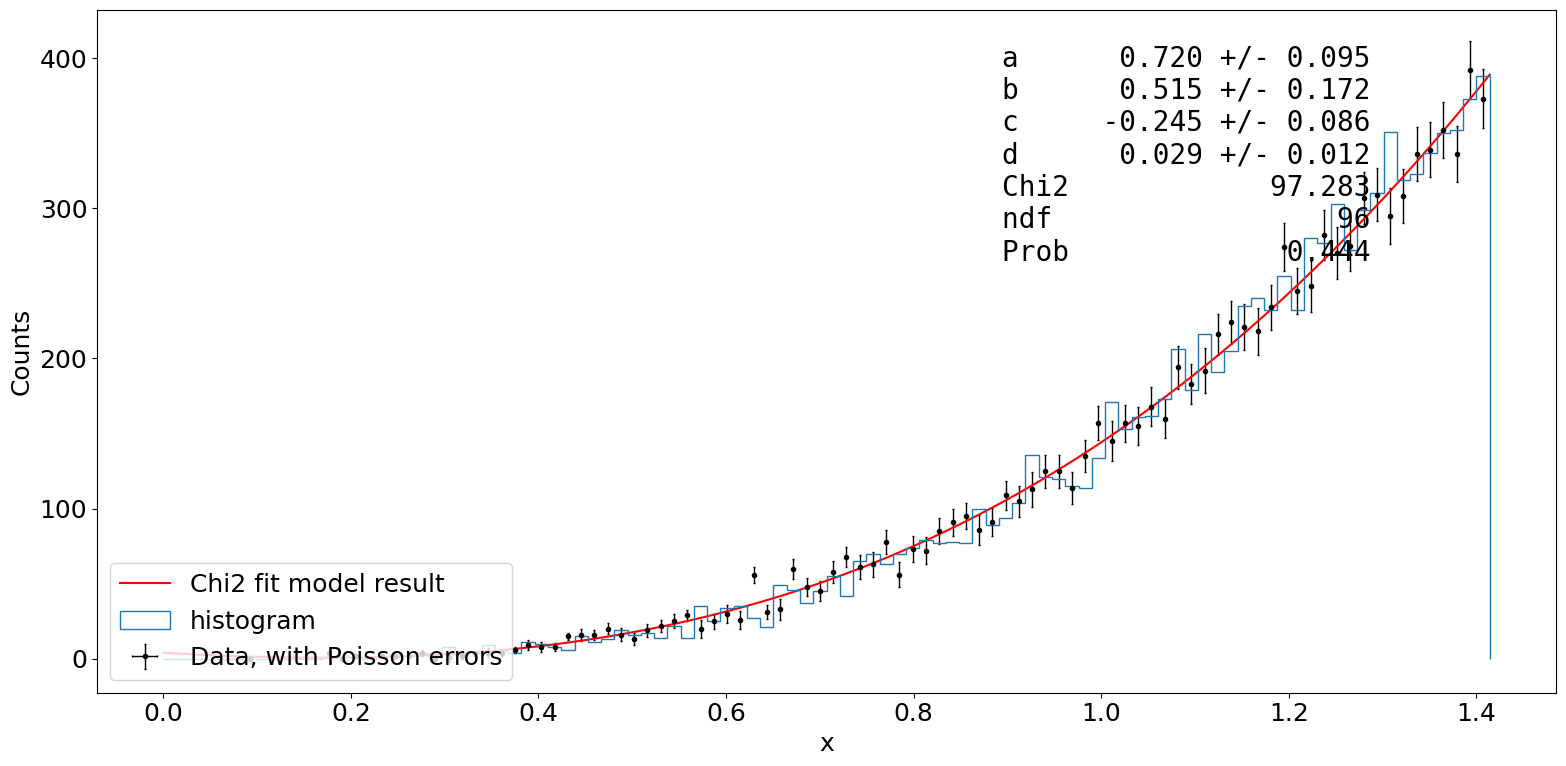

In [91]:
# Create just a single figure and axes, along with a histogram with uncertainties:
fig, ax = plt.subplots(figsize=(16, 8))  # figsize is in inches

ax.errorbar(x_ar, y_ar, yerr=sy_ar, xerr=0.0, label='Data, with Poisson errors', fmt='.k',  ecolor='k', elinewidth=1, capsize=1, capthick=1)

# Set the figure texts; xlabel, ylabel and title.
ax.set(xlabel="x", # the label of the y axis
       ylabel="Counts"),  # the label of the y axis
       #title="Distribution of Gaussian and exponential numbers", # the title of the plot
       #ylim=[0.0,None]) # Setting the miminum to zero

# Adding fit function to plot:
x_axis = np.linspace(xmin, xmax, 1000)
ax.plot(x_axis, pol3(x_axis, *minuit_chi2_ar.values[:]), '-r', label='Chi2 fit model result') 
ax.hist(x_accepted, bins=N_bins, range=(xmin, xmax), histtype="step", label="histogram")

# Adding fit results to plot:
d = {'a':   [minuit_chi2_ar.values['a'], minuit_chi2_ar.errors['a']],
     'b':       [minuit_chi2_ar.values['b'], minuit_chi2_ar.errors['b']],
     'c':       [minuit_chi2_ar.values['c'], minuit_chi2_ar.errors['c']],
     'd':     [minuit_chi2_ar.values['d'], minuit_chi2_ar.errors['d']],
     'Chi2':     chi2_value_ar,
     'ndf':      Ndof_value_ar,
     'Prob':     Prob_value_ar,
    }

text = nice_string_output(d, extra_spacing=2, decimals=3)
add_text_to_ax(0.62, 0.95, text, ax, fontsize=20)
ax.legend(loc='lower left', fontsize=18); # could also be # loc = 'upper right' e.g.
fig.tight_layout()

## Problem: 

1) Calculate $C$ such that f(x) is normalised [Analytical problem].

The integral of the pdf over the range should be equal to one. Integrate and then set it equal to 1 and solve for c.

$$1 = \int_0^c x^3 dx = \frac{1}{4} c^4$$

$$c = 4^{\frac{1}{4}}$$

2) Calculate the relevant integral (below) and inverted function for using the transformation method. Check that the limits actually makes sense [Analytical problem]. Note that it is important to include the limits!

$$F(x) = \int_{-\infty}^{x} f(x') dx' = \int_0^x x^3 dx = \frac{1}{4} x^4 = r$$

$$x(r) = (4r)^{\frac{1}{4}}$$

r goes from 0 to 1 while x goes from 0 to 4^(1/4). Luckily, when inserting r=1 in the above, we get x=4^(1/4) so the limits make sense.

3) Produce random points following $f(x) = x^3$, in the interval $[0, C]$ using **both** the Transformation and the Accept/Reject method.

4) Fit your data with a third degree polynomial, and check that the coefficients correspond to what you would expect.

The coefficients correspond to what I would expect. They don't match the simulated distribution exactly, but the coefficients do overlap with the expected ones within approximately 3 sigma.

5) Now try to change the interval from [0,C] to [1,C], and see how the limits change.

$$1 = \int_1^c x^3 dx = \frac{1}{4} (c^4 - 1)$$

$$c = 5^{\frac{1}{4}}$$



# Learning points:

As a basic principle, this exercise should make you capable of using two methods for generating random numbers according to a 1D PDF f(x) based on uniform random numbers (provided by a standard algorithm):
1. Transformation method (using integral+inverse of f(x))
2. Accept-Reject method (using sampling in 2D compared to f(x))

You should know:
1. The advantages and limitations of each method.
2. How to get the desired result out of each method.

Finally, you should understand the motivation behind generating random numbers according to a given distribution, namely for simulating complicated situations (e.g. experimental setup), and evaluating the outcome.